# Blood Pressure Abnormality 

## Problem Statement : 

### To Perform "Logistic Regression" on patient with abnormal blood-pressure. Including 'Decision tree' , 'Random Forest' , 'Ada Boosting' and 'Naive Bayes' algorithm.

In [48]:
# Import the Library
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

In [4]:
# Read the file 
bpa = pd.read_csv(r"D:\sushma\data sets\Patient_with_abnormal_bloodpressure.csv")

In [5]:
# Check the head file 
bpa.head()

,Patient_Number,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,BMI,Sex,Pregnancy,Smoking,Physical_activity,salt_content_in_the_diet,alcohol_consumption_per_day,Level_of_Stress,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,1,11.28,0.90,34,23,1,1.0,0,45961,48071,NaN,2,1,1
1,2,0,9.75,0.23,54,33,1,NaN,0,26106,25333,205.0,3,0,0
2,3,1,10.79,0.91,70,49,0,NaN,0,9995,29465,67.0,2,1,0
3,4,0,11.00,0.43,71,50,0,NaN,0,10635,7439,242.0,1,1,0
4,5,1,14.17,0.83,52,19,0,NaN,0,15619,49644,397.0,2,0,0


In [7]:
# Check the shape of given data set 

bpa.shape

(2000, 15)

In [8]:
# Check if any nulls is there 

bpa.isnull().sum()

Patient_Number                      0
Blood_Pressure_Abnormality          0
Level_of_Hemoglobin                 0
Genetic_Pedigree_Coefficient       92
Age                                 0
BMI                                 0
Sex                                 0
Pregnancy                        1558
Smoking                             0
Physical_activity                   0
salt_content_in_the_diet            0
alcohol_consumption_per_day       242
Level_of_Stress                     0
Chronic_kidney_disease              0
Adrenal_and_thyroid_disorders       0
dtype: int64

### Remove the nulls,
### 1) first check the no.of particulars by applying 'value_counts'.
### 2) IF all data is numeric, then apply the mean function over it.
### 3) If data is in categorical form, then feel the NA values with most repeated NA valued variable.

In [10]:
bpa.Genetic_Pedigree_Coefficient.value_counts()
bpa.Genetic_Pedigree_Coefficient = bpa.Genetic_Pedigree_Coefficient.fillna(bpa.Genetic_Pedigree_Coefficient.mean())

In [11]:
bpa.Pregnancy.value_counts()
bpa.Pregnancy = bpa.Pregnancy.fillna(0)

In [12]:
bpa.alcohol_consumption_per_day.value_counts()
bpa.alcohol_consumption_per_day = bpa.alcohol_consumption_per_day.fillna(bpa.alcohol_consumption_per_day.mean())

In [13]:
# Check for the nulls is any 

bpa.isnull().sum()

Patient_Number                   0
Blood_Pressure_Abnormality       0
Level_of_Hemoglobin              0
Genetic_Pedigree_Coefficient     0
Age                              0
BMI                              0
Sex                              0
Pregnancy                        0
Smoking                          0
Physical_activity                0
salt_content_in_the_diet         0
alcohol_consumption_per_day      0
Level_of_Stress                  0
Chronic_kidney_disease           0
Adrenal_and_thyroid_disorders    0
dtype: int64

In [14]:
# Drop the unwanted data if any 

bpa =bpa.drop(["Smoking","Physical_activity", "salt_content_in_the_diet", "Level_of_Stress", "Sex","BMI", "Patient_Number"], axis = 1)

In [15]:
# check the shape of data set 
bpa.shape

(2000, 8)

## Data sampling

### Data sampling in train and test with 80-20 percentage

### Similarly, build your test data for the all rows and columns from 1 and so forth  for x ( independant variable )
### And test data for all the rows and target column i.e. 0 ( dependant varibale )

In [19]:
from sklearn.model_selection import train_test_split
bpa_train, bpa_test = train_test_split(bpa, test_size = 0.2)

In [20]:
# Check the head function 

bpa.head()

,Blood_Pressure_Abnormality,Level_of_Hemoglobin,Genetic_Pedigree_Coefficient,Age,Pregnancy,alcohol_consumption_per_day,Chronic_kidney_disease,Adrenal_and_thyroid_disorders
0,1,11.28,0.90,34,1.0,251.008532,1,1
1,0,9.75,0.23,54,0.0,205.000000,0,0
2,1,10.79,0.91,70,0.0,67.000000,1,0
3,0,11.00,0.43,71,0.0,242.000000,1,0
4,1,14.17,0.83,52,0.0,397.000000,0,0


### Similarly, build your test data for the all rows and columns from 1 and so forth  for x ( independant variable )
### And test data for all the rows and target column i.e. 0 ( dependant varibale )

In [21]:
bpa_train_x = bpa_train.iloc[:,1:]
bpa_train_y = bpa_train.iloc[:, 0]

In [22]:
bpa_test_x = bpa_test.iloc[ : , 1:]
bpa_test_y = bpa_test.iloc[ :, 0]

In [23]:
print(bpa_train_x.shape)
print(bpa_train_y.shape)

(1600, 7)
(1600,)


In [24]:
print(bpa_test_x.shape)
print(bpa_test_y.shape)

(400, 7)
(400,)


# Build the logistic Regression Model

### Import the LogisticRegression model using sklearn_model selection.

In [25]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [26]:
# fit the model over train data set of x and y 

logreg.fit(bpa_train_x, bpa_train_y)

C:\Users\Pravin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
# Do your prediction over test data of x


pred_test_bpa = logreg.predict(bpa_test_x)
pred_test_bpa

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,

#### Logistic Regression model is verified over confusion matrix 
#### Its strength is calculated over confusion matrix 
#### More are our true values, more stable is our model

In [30]:
# import funciton 'confusion matrix' form 'sklearn.metrics- library'

from sklearn.metrics import confusion_matrix

In [31]:
# Now we can draw the confusion matrix by using confusion matrix fucntion 

table1 = confusion_matrix(pred_test_bpa, bpa_test_y)
table1

array([[148,  50],
       [ 61, 141]], dtype=int64)

In [32]:
# To calculate, Accuracy - method - I 

Acc = table1.diagonal().sum() * 100 / table1.sum()
Acc

72.25

In [34]:
# Method -II - to Calculate the Accuracy

# Instead using above confusion matrix table method, we can also use following 'in-build' function named 'accuracy_score'
# Accuracy score directly gives 


from sklearn.metrics import accuracy_score
accuracy_score(pred_test_bpa, bpa_test_y) * 100

72.25

In [35]:
#  here is the formula for TPR (true positive rate )
# we are taking into consideration the elements by square brackets by using table fucntion.

Tpr = table1[1][1] / (table1[1][1] + table1[0][1] )
Tpr

0.7382198952879581

In [36]:
### Simly, here is the formula for FPR ( false positive rate )

Fpr = table1[1][0] / (table1[1][0] + table1[0][0] )
Fpr

0.291866028708134

In [37]:
# Beta values for each x variable ( independant varibale)


logreg.coef_

array([[ 1.26323267e-01, -4.77040469e-01, -5.31110358e-03,
         3.35485140e-01,  3.36503725e-04,  1.84950446e+00,
         1.22784290e+00]])

In [38]:
# Intercept value / slope / C value or / B-Beta zero value

logreg.intercept_

array([-2.59105648])

#### Prediction Probablity over test data

In [39]:
pred_prob = logreg.predict_proba(bpa_test_x)
pred_prob

array([[0.84450743, 0.15549257],
       [0.79752303, 0.20247697],
       [0.08986015, 0.91013985],
       [0.81972744, 0.18027256],
       [0.47412002, 0.52587998],
       [0.79242165, 0.20757835],
       [0.14631749, 0.85368251],
       [0.78663937, 0.21336063],
       [0.76307651, 0.23692349],
       [0.41535797, 0.58464203],
       [0.45675928, 0.54324072],
       [0.20025794, 0.79974206],
       [0.23591502, 0.76408498],
       [0.85521157, 0.14478843],
       [0.3793241 , 0.6206759 ],
       [0.13141489, 0.86858511],
       [0.65428058, 0.34571942],
       [0.53171596, 0.46828404],
       [0.84085457, 0.15914543],
       [0.56615543, 0.43384457],
       [0.43412225, 0.56587775],
       [0.84618363, 0.15381637],
       [0.61238906, 0.38761094],
       [0.08675995, 0.91324005],
       [0.09481622, 0.90518378],
       [0.19270549, 0.80729451],
       [0.33834317, 0.66165683],
       [0.81958458, 0.18041542],
       [0.22520374, 0.77479626],
       [0.23414035, 0.76585965],
       [0.

In [40]:
# TO have the clearity about the values compare the predicted probability values with original predicted test data set of 

pred_test_bpa

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,

In [41]:
pred_prob.shape

(400, 2)

### To plot the curve and area under the curve, you have to import library following

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [43]:
log_roc_auc = roc_auc_score(bpa_test_y, pred_test_bpa)
log_roc_auc

0.723176933289912

In [44]:
pred_value_prob = pd.DataFrame(pred_prob)
pred_value_prob.head(10)

,0,1
0,0.844507,0.155493
1,0.797523,0.202477
2,0.089860,0.910140
3,0.819727,0.180273
4,0.474120,0.525880
5,0.792422,0.207578
6,0.146317,0.853683
7,0.786639,0.213361
8,0.763077,0.236923
9,0.415358,0.584642


In [45]:
pred_value_prob = pred_value_prob.iloc[:, 1]

In [47]:
fpr , tpr , threshold = roc_curve(bpa_test_y, pred_value_prob)

Text(0.5, 0.5, 'AUROC VALUE IS .25')

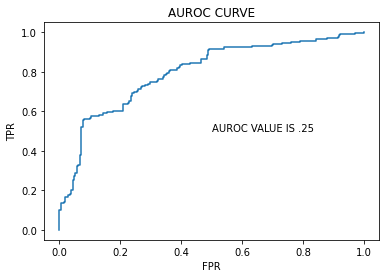

In [50]:
plt.plot(fpr, tpr )
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title("AUROC CURVE")
plt.text(x = .5 , y =.5 , s = "AUROC VALUE IS .25")

# Decision Tree

In [51]:
# import library to run decision tree calssifier

from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth= 4, min_samples_split= 50)

#### Your model is built. Now run your model over train data of x and y

In [53]:
dt.fit(bpa_train_x, bpa_train_y)

DecisionTreeClassifier(max_depth=4, min_samples_split=50)

#### Now, make some prediction over test data of x

In [54]:
pred_dt = dt.predict(bpa_test_x)
pred_dt            # cross verify it with original data manually

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,

In [55]:
# Find out the confusion matrix over test data of y and predicted data 

tab_dt = confusion_matrix(pred_dt, bpa_test_y)
tab_dt

array([[192,  60],
       [ 17, 131]], dtype=int64)

#### Now, find out the accuracy for the above matrix

In [56]:
# Here is the accuracy of the model 

Acc = tab_dt.diagonal().sum() / tab_dt.sum()
Acc

0.8075

#### here is the one important feature that 'Decision tree' has

In [57]:
dt.feature_importances_

array([0.27912592, 0.36900427, 0.00803239, 0.        , 0.        ,
       0.34283695, 0.00100047])

In [59]:
bpa_test_x.columns

Index(['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age',
       'Pregnancy', 'alcohol_consumption_per_day', 'Chronic_kidney_disease',
       'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [60]:
dt.feature_importances_.sum()

1.0

In [61]:
len(dt.feature_importances_)

7

In [62]:
bpa_test_x.shape

(400, 7)

In [64]:
feature_importance = pd.DataFrame({"Feature Names" : bpa_test_x.columns , "Importance" : dt.feature_importances_})
feature_importance

,Feature Names,Importance
0,Level_of_Hemoglobin,0.279126
1,Genetic_Pedigree_Coefficient,0.369004
2,Age,0.008032
3,Pregnancy,0.000000
4,alcohol_consumption_per_day,0.000000
5,Chronic_kidney_disease,0.342837
6,Adrenal_and_thyroid_disorders,0.001000


In [65]:
feature_importance.sort_values("Importance" , ascending = False)

,Feature Names,Importance
1,Genetic_Pedigree_Coefficient,0.369004
5,Chronic_kidney_disease,0.342837
0,Level_of_Hemoglobin,0.279126
2,Age,0.008032
6,Adrenal_and_thyroid_disorders,0.001000
3,Pregnancy,0.000000
4,alcohol_consumption_per_day,0.000000


# Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators= 100 , class_weight= 'balanced')

In [67]:
rfc.fit(bpa_train_x, bpa_train_y)

RandomForestClassifier(class_weight='balanced')

In [68]:
# predict for the test data of x 

pred_rfc = rfc.predict(bpa_test_x)
pred_rfc

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [69]:
# to check out the confusion matrix

tab_rfc = confusion_matrix(pred_rfc, bpa_test_y)
tab_rfc

array([[191,  28],
       [ 18, 163]], dtype=int64)

In [70]:
# Accuracy for the RF
Acc = tab_rfc.diagonal().sum() / tab_rfc.sum()
Acc

0.885

#### We have to add one important feature i.e. feature importances

In [71]:
rfc.feature_importances_

array([0.30336155, 0.32220149, 0.08696924, 0.00737606, 0.09050449,
       0.13248966, 0.05709752])

In [72]:
bpa_test_x.columns

Index(['Level_of_Hemoglobin', 'Genetic_Pedigree_Coefficient', 'Age',
       'Pregnancy', 'alcohol_consumption_per_day', 'Chronic_kidney_disease',
       'Adrenal_and_thyroid_disorders'],
      dtype='object')

In [73]:
rfc_feature_importance = pd.DataFrame({"Feature Importance" :bpa_test_x.columns, "Importance" : rfc.feature_importances_ })
rfc_feature_importance

,Feature Importance,Importance
0,Level_of_Hemoglobin,0.303362
1,Genetic_Pedigree_Coefficient,0.322201
2,Age,0.086969
3,Pregnancy,0.007376
4,alcohol_consumption_per_day,0.090504
5,Chronic_kidney_disease,0.132490
6,Adrenal_and_thyroid_disorders,0.057098


#### Sort the above values from this

In [75]:
rfc_feature_importance.sort_values("Importance" , ascending = False)

,Feature Importance,Importance
1,Genetic_Pedigree_Coefficient,0.322201
0,Level_of_Hemoglobin,0.303362
5,Chronic_kidney_disease,0.132490
4,alcohol_consumption_per_day,0.090504
2,Age,0.086969
6,Adrenal_and_thyroid_disorders,0.057098
3,Pregnancy,0.007376


#  Ada Boosting

In [76]:
# Import the AdaBoostClassifir and Decision tree classifier, because it is working over 'Decision tree'
# AdaBoostclassifier is works on Decision Tree.

from sklearn.ensemble import AdaBoostClassifier

from sklearn.tree import DecisionTreeClassifier

In [77]:
# Define decision tree 

dt = DecisionTreeClassifier()

abc = AdaBoostClassifier(dt, 10)

C:\Users\Pravin\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_estimators=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [78]:
abc.fit(bpa_train_x, bpa_train_y)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10)

In [79]:
# Predict over test data 

pred_abc = abc.predict(bpa_test_x)
pred_abc

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,

In [80]:
# Build your confusion matrix

In [81]:
tab_abc = confusion_matrix(pred_abc, bpa_test_y)
tab_abc

array([[189,  35],
       [ 20, 156]], dtype=int64)

In [82]:
Acc_abc = tab_abc.diagonal().sum() / tab_abc.sum()
Acc_abc

0.8625

# Naive Bayes Classifier

In [83]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [85]:
nb.fit(bpa_train_x, bpa_train_y)

MultinomialNB()

In [87]:
pred_nb = nb.predict(bpa_test_x)
pred_nb

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,

In [88]:
tab_nb = confusion_matrix(pred_nb, bpa_test_y)
tab_nb

array([[120,  76],
       [ 89, 115]], dtype=int64)